In [96]:
import pandas as pd
from dotenv import load_dotenv
import os
from os.path import join, dirname

In [97]:
import tweepy as tw
from textblob import TextBlob

In [98]:
from tweepy.api import API
from tweepy.auth import AppAuthHandler, OAuthHandler
from tweepy.cache import Cache, FileCache, MemoryCache
from tweepy.cursor import Cursor
from tweepy.error import RateLimitError, TweepError
from tweepy.models import DirectMessage, Friendship, ModelFactory, SavedSearch, SearchResults, Status, User
from tweepy.streaming import Stream, StreamListener

In [99]:
load_dotenv()

consumer_key = os.environ.get("consumer_key")
consumer_secret = os.environ.get("consumer_secret")
access_token = os.environ.get("access_token")
access_token_secret = os.environ.get("access_token_secret")

In [100]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth)

In [101]:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth =  tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [102]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="Santi_ABASCAL", count=5)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    

Number of tweets extracted: 5.

5 recent tweets:

...y siguen las colas en Ávila para el acto de VOX #EspañaSiempre https://t.co/SZcSQovKIE
Colas en Ávila una hora antes del inicio del acto de VOX #EspañaSiempre #Ávila #AhoraVOX https://t.co/DJ6xZGrF5K
Absurda noticia. No hay ninguna costa que pagar porque todo lo que han hecho nuestros abogados @Ortega_Smith y… https://t.co/GFfip9DY08
El próximo lunes 21-O estaré en el acto público de VOX en ALBACETE. #EspañaSiempre #Albacete #VOX https://t.co/wj2tb39AzV
RT @vox_es: PP, PSOE y Ciudadanos: distintos caminos, mismos objetivos. En lo político, en lo social y ahora también en lo lingüístico, imp…


In [103]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

Tweets
0  ...y siguen las colas en Ávila para el acto de...
1  Colas en Ávila una hora antes del inicio del a...
2  Absurda noticia. No hay ninguna costa que paga...
3  El próximo lunes 21-O estaré en el acto públic...
4  RT @vox_es: PP, PSOE y Ciudadanos: distintos c...

# por hastag #


In [104]:
import csv

In [105]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [108]:
#####Santiago_abascal
# Open/Create a file to append data
csvFile = open('Abascal13.csv', 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,q="#SantiagoAbascal" + " -filter:retweets",count=10000,
                           lang="es",
                           since="2019-10-10").items():
    print (tweet.created_at, tweet.text)
    csvWriter.writerow([tweet])

2019-10-15 15:53:38 Aquí lo tenéis !!! Espero que os guste
https://t.co/BVzRiVsRPF
#ElHormiguero #SantiagoAbascalEH #Vox… https://t.co/XD0Q04ZhHi
2019-10-15 12:41:14 🇪🇸Miles de patriotas con 💚#VOX y 💚#SantiagoAbascal en 💚#Valladolid
 https://t.co/xCFZHJEeWf vía @YouTube
2019-10-15 10:32:06 Frente a la pasividad del gobierno socialista en el golpe de estado que se está produciendo en Cataluña, aparte de… https://t.co/R0z0OnqAd1
2019-10-15 08:22:57 Creo que aún no lo saben !!! #progres #psoe  #franco #francoamuerto #voz #santiagoabascal #elecciones2019 https://t.co/FXIVteRmpm
2019-10-15 07:54:52 Si parece un telegrama... Tic, tic, TAC, TAC, toc y tic. Fin de la noticia. Y no ponen bien ABASCAL no vaya a ser q… https://t.co/39JxrhiNJ0
2019-10-14 21:54:06 Mitin de Santiago Abascal en Ávila 15 Octubre 2019 #EspañaSiempre #vox #EleccionesNoviembre2019 #Elecciones… https://t.co/z6ryp5ksNp
2019-10-14 21:28:44 España siempre!!!! #SantiagoAbascal presidente #VOX https://t.co/zfeSPEBjkI
2019-10-1

2019-10-11 14:06:49 @sanchezcastejon Seguid así rojelios. Estáis haciendo la campaña perfecta a la derecha con vuestras falacias.

 Aye… https://t.co/W2Lq8rnk1I
2019-10-11 14:00:43 A mi la verdad que no me representas, así que despierta de una vez y sal de la caverna. Y si no despiertas, quédate… https://t.co/X8VgXrB3N7
2019-10-11 13:55:05 Hay que ser muy baboso y sin vergüenza para decir que si el niño está enfermo o padece una enfermedad que se lo den… https://t.co/DRsbtrVKi1
2019-10-11 13:35:21 https://t.co/uZ3DhsQLet #SantiagoAbascal, el líder de #Vox y candidato a la presidencia del Gobierno, ha visitado e… https://t.co/h2aFruXUwr
2019-10-11 13:12:22 https://t.co/hzXLmbbrGF #SantiagoAbascal, el líder de #Vox y candidato a la presidencia del Gobierno, ha visitado e… https://t.co/AmZfVJNT25
2019-10-11 13:12:13 Esta es una entrevista concedida por @Santi_ABASCAL  al portal @zendalibros de @perezreverte en marzo pasado Realiz… https://t.co/RL0lepSpTN
2019-10-11 13:10:46 Espero ver a #

2019-10-10 21:57:44 #SantiagoAbascal
Para ser presidente de un partido " fascista, xenófobo, homófogo,..." según los progres,  hemos vi… https://t.co/yyiHxZhdPB
2019-10-10 21:55:28 ✅ Como cambia la cosa cuando sabes explicarte bien frente a los titulares y la manipulación sensacionalista.
Cohere… https://t.co/tgVpMFdIUO
2019-10-10 21:52:09 Que asco da el programa del hormiguero y la mayoría de los medios de televisión #SantiagoAbascal
2019-10-10 21:48:34 #SantiagoAbascalEH #SantiagoAbascal  Le he visto cercano,condescendiente ¿pero que le pasaba al Sr.Motos? Todo el rato mirando ¿a dónde?
2019-10-10 21:43:36 #SantiagoAbascalEH #SantiagoAbascal Clase maestra de humanidad, la vida antes que la muerte, la legalidad por delan… https://t.co/oAFi6ewabA
2019-10-10 21:43:14 Vale ahora fuera de coñas @GirautaOficial ¿vas a aceptar la propuesta que te ha hecho @Santi_ABASCAL en… https://t.co/RGfUiE9yZA
2019-10-10 21:37:15 @amandaschez #PabloMotos ha ido con todas las preguntas "tipo" que haría u

2019-10-10 20:49:16 Pues a mi lo que mas me gusta de este hombre es que dice lo que piensa sin buscar ningun aplauso #SantiagoAbascal
2019-10-10 20:48:50 Es una pena que haya temas en los que se queda muy atrás,porque hay otros en los que tiene mas razon que un santo,a… https://t.co/tW8UFUiGXB
2019-10-10 20:48:18 Hay tantas cosas que #santiagoabascal no entiende https://t.co/8CdhdrLC3s
2019-10-10 20:47:44 España viendo en Cuatro a #SantiagoAbascal y disfrutando. A Pablo Motos le sale un poco de humo por las orejas porq… https://t.co/ZdynJVq6V8
2019-10-10 20:47:07 #SantiagoAbascalEH #santiagoabascal pero si Rivera y Abascal son económicamente idénticos, los dos más radicales liberales.
2019-10-10 20:46:37 "yo veo en Pedro Sánchez una actitud altiva y chulesca" 
Espera que la tuya se caracteriza por la humildad y la hon… https://t.co/JLs3pXVNFC
2019-10-10 20:46:33 A ver si el próximo día que vaya alguien a promocionar alguien a tu programa o que contrates a algún famoso de turn… https://

In [109]:
df = pd.read_csv("Abascal13.csv", header = None)

In [110]:
df

0
0    Status(_api=<tweepy.api.API object at 0x7fd4ff...
1    Status(_api=<tweepy.api.API object at 0x7fd4ff...
2    Status(_api=<tweepy.api.API object at 0x7fd4ff...
3    Status(_api=<tweepy.api.API object at 0x7fd4ff...
4    Status(_api=<tweepy.api.API object at 0x7fd4ff...
..                                                 ...
342  Status(_api=<tweepy.api.API object at 0x7fd4ff...
343  Status(_api=<tweepy.api.API object at 0x7fd4ff...
344  Status(_api=<tweepy.api.API object at 0x7fd4ff...
345  Status(_api=<tweepy.api.API object at 0x7fd4ff...
346  Status(_api=<tweepy.api.API object at 0x7fd4ff...

[347 rows x 1 columns]

In [113]:
tweets = tw.Cursor(api.search,
              q="Abascal",
              lang="es").items(1000)

In [114]:
tweets

In [115]:
users_locs = [[tweet.user.screen_name, tweet.user.location, tweet.text] for tweet in tweets]

In [116]:
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user', "location", "tweet"])
tweet_text

user                     location  \
0       CasviFactory                                
1        JonnyRasero              Castamere Ruins   
2     andremaquieira                                
3            XavMasR    l'Hospitalet de Llobregat   
4             sysco5  Una Autonomia Galactica 155   
..               ...                          ...   
995         Amelycie                       Madrid   
996  manuelajaravid1               Toledo, España   
997    escofet_jaume                                
998     MarkusReilly                   Katalonien   
999       scarmen173                                

                                                 tweet  
0    "Las falsedades de Abascal y Espinosa de los M...  
1    RT @AntonioMaestre: A ver si se atreve a conte...  
2    RT @maribelfdez2: Santi Abascal: Ayer ganaste ...  
3    RT @either_mark: "P***S C*******S, le metí así...  
4    RT @asmapar: @albasidera @jordiborras La ultra...  
..                                                 ...  
995  RT @Foxxthefox: Abascal dice, que va a recurri...  
996  RT @ana_gandi: Los votantes del PSOE van a ten...  
997  RT @either_mark: "P***S C*******S, le metí así...  
998  RT @either_mark: "P***S C*******S, le metí así...  
999  @Miguichiqui @Santi_ABASCAL Mi madre en paz de...  

[1000 rows x 3 columns]

# popularidad

In [13]:
palabra = input("Buscar: ")
numero_de_Tweets = int(input(u"Número de tweets a capturar: "))
lenguaje = input("Idioma [es/en]:")

Buscar: Abascal
Número de tweets a capturar: 1000
Idioma [es/en]:es


In [14]:
def ObtenerTweets(palabra="Abascal",times=1000,leguanje="es"):
    #Se define las listas que capturan la popularidad
    popularidad_list = []
    numeros_list = []
    numero = 1
    for tweet in tweepy.Cursor(api.search, palabra, lang=lenguaje, since="2019-10-10", until="2019-10-11").items(numero_de_Tweets):
        try:
            #Se toma el texto, se hace el analisis de sentimiento
            #y se agrega el resultado a las listas
            analisis = TextBlob(tweet.text)
            analisis = analisis.sentiment
            popularidad = analisis.polarity
            popularidad_list.append(popularidad)
            numeros_list.append(numero)
            numero = numero + 1

        except tweepy.TweepError as e:
            print(e.reason)

        except StopIteration:
            break
    return (numeros_list,popularidad_list,numero)

In [82]:
texto="ivanedlm trending topics on twitter right now pablo motorcycles abascal how good we are going to have fun"

In [77]:
blob_texto = TextBlob(texto)

In [93]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/angel/nltk_data...


True

In [94]:
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid=SentimentIntensityAnalyzer()

In [95]:
sid.polarity_scores(texto)    
    

{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'compound': 0.7351}

In [80]:
blob_texto.translat
e(to="en")

TextBlob("ivanedlm trending topics on twitter right now pablo motorcycles abascal how good we are going to have fun")

In [33]:
def GraficarDatos(numeros_list,popularidad_list,numero):
    axes = plt.gca()
    axes.set_ylim([-1, 2])
    
    plt.scatter(numeros_list, popularidad_list)
    popularidadPromedio = (sum(popularidad_list))/(len(popularidad_list))
    popularidadPromedio = "{0:.0f}%".format(popularidadPromedio * 100)
    #time  = datetime.now().strftime("A : %H:%M\n El: %m-%d-%y")
    plt.text(0, 1.25, 
             "Sentimiento promedio:  " + str(popularidadPromedio) + "\n", #+ time, 
             fontsize=12, 
             bbox = dict(facecolor='none', 
                         edgecolor='black', 
                         boxstyle='square, pad = 1'))
    
    plt.title("Sentimientos sobre " + palabra + " en twitter")
    plt.xlabel("Numero de tweets")
    plt.ylabel("Sentimiento")
    plt.show()

In [19]:
 numeros_list,popularidad_list,numero = ObtenerTweets(palabra,numero_de_Tweets,lenguaje)

In [37]:
numero

1001

In [26]:
import matplotlib.pyplot as plt 
%matplotlib inline

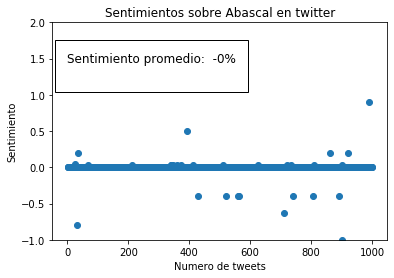

In [34]:
 GraficarDatos(numeros_list,popularidad_list,numero)